<a href="https://colab.research.google.com/github/rizkytama28/Image-Segmentation-Swin-UNet-/blob/main/Image_Classification_dengan_Swin_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

print("Pilih file kaggle.json yang sudah diunduh.")
files.upload()

Pilih file kaggle.json yang sudah diunduh.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizkytamadavid","key":"952b7876beaca989be3c29d197011d48"}'}

In [ ]:
# Membuat folder .kaggle dan memindahkan file API ke sana
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Mengatur izin akses agar aman
!chmod 600 ~/.kaggle/kaggle.json

print("\n Koneksi ke Kaggle API berhasil !")


 Koneksi ke Kaggle API berhasil !


In [ ]:
# Sel 2: Mengunduh dataset
!kaggle datasets download -d nikhilroxtomar/brain-tumor-segmentation

print("\n Proses unduh selesai.")

In [ ]:
# Memeriksa nama file dan melakukan unzip

print("Isi direktori saat ini:")
!ls -l

print("\nMelakukan ekstraksi file 'brain-tumor-segmentation.zip'...")
!unzip -q brain-tumor-segmentation.zip

print(" File berhasil diekstrak")


Total gambar ditemukan: 3064
Menampilkan 5 sampel acak.


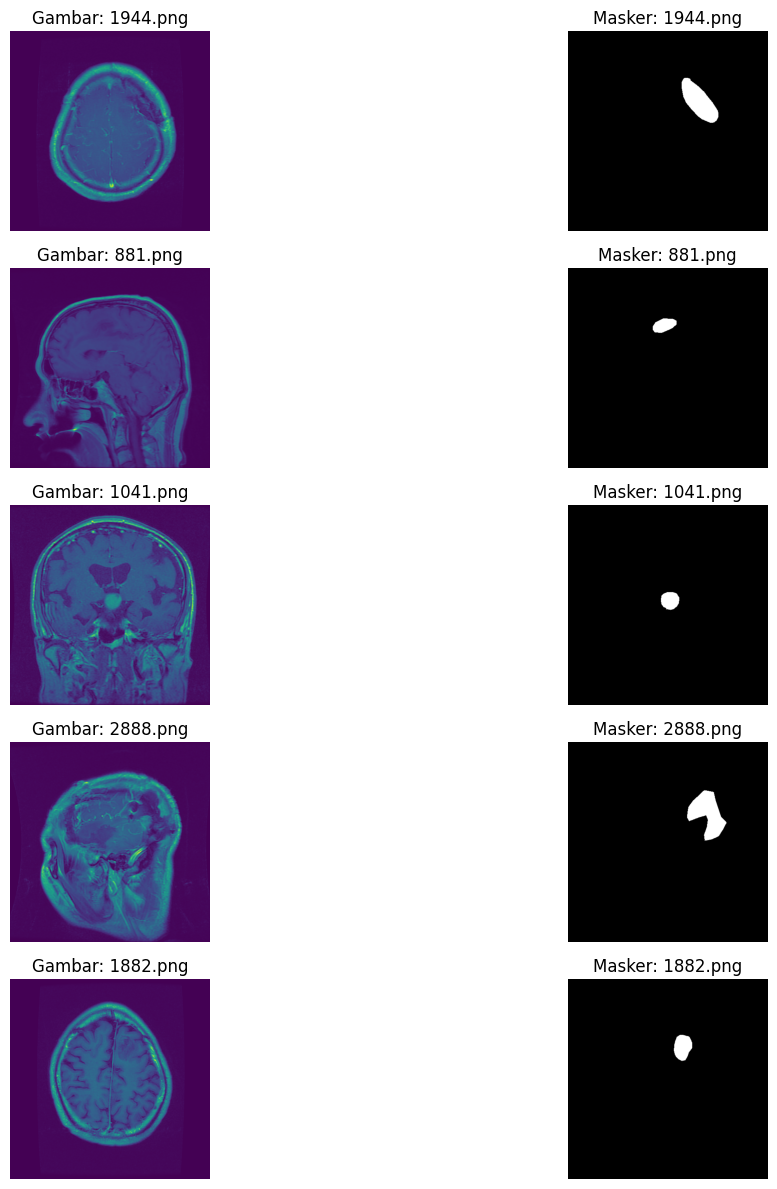


 Visualisasi  berhasil.


In [ ]:
# Mendefinisikan Path, Mencocokkan File, dan Visualisasi

import os
import matplotlib.pyplot as plt
from PIL import Image
import random # Kita akan pakai random untuk mengambil sampel acak


# mendefinisikan lokasi dataset
image_dir = '/content/drive/MyDrive/ProyekPemrograman/TO/images'
mask_dir = '/content/drive/MyDrive/ProyekPemrograman/TO/masks'

try:
    all_image_files = os.listdir(image_dir)
    # Ambil 5 file acak dari daftar gambar untuk visualisasi
    sample_image_files = random.sample(all_image_files, 5)

    print(f"\nTotal gambar ditemukan: {len(all_image_files)}")
    print("Menampilkan 5 sampel acak.")

    #Looping, Mencocokkan, dan Visualisasi
    plt.figure(figsize=(15, 12))

    for i, image_filename in enumerate(sample_image_files):
        # Membangun path lengkap ke file gambar
        image_path = os.path.join(image_dir, image_filename)

        # Membangun nama file masker yang bersesuaian berdasarkan pola
        # Contoh: 'file.tif' -> 'file_mask.tif'
        mask_filename = image_filename.replace('.tif', '_mask.tif')
        mask_path = os.path.join(mask_dir, mask_filename)

        # Membuka gambar dan masker
        image = Image.open(image_path)
        mask = Image.open(mask_path)

        # Plot Gambar Asli
        plt.subplot(5, 2, 2*i + 1)
        plt.imshow(image)
        plt.title(f"Gambar: {image_filename}")
        plt.axis('off')

        # Plot Masker
        plt.subplot(5, 2, 2*i + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Masker: {mask_filename}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\n Visualisasi  berhasil.")

except FileNotFoundError:
    print(f"\n Eror: folder '{image_dir}' atau '{mask_dir}' tidak ditemukan.")
    print("Pastikan langkah unzip berhasil .")

In [ ]:
# Import library

import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm # Untuk menampilkan progress bar

# Menentukan ukuran gambar
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

# Mendefinisikan kembali path untuk memastikan
image_dir = '/content/drive/MyDrive/ProyekPemrograman/TO/images'
mask_dir = '/content/drive/MyDrive/ProyekPemrograman/TO/masks'

In [ ]:
# Proses memuat dan pre-processing data

# Mengambil daftar semua nama file gambar
all_image_files = os.listdir(image_dir)

JUMLAH_SAMPEL = 3064
all_image_files = all_image_files[:JUMLAH_SAMPEL]
print(f"Menggunakan {JUMLAH_SAMPEL} gambar.")


X = [] # menyimpan gambar
y = [] # menyimpan masker

print("\nMemulai proses memuat dan pre-processing data...")

# Menggunakan tqdm untuk melihat progress
for image_filename in tqdm(all_image_files, desc="Processing Images"):
    # Memproses gambar
    image_path = os.path.join(image_dir, image_filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

    # Memproses masker
    mask_filename = image_filename.replace('.tif', '_mask.tif')
    mask_path = os.path.join(mask_dir, mask_filename)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT))
    mask = mask / 255.0
    mask = (mask > 0.5).astype(np.float32)

    X.append(image)
    y.append(mask)

print("\nProses selesai!")

Menggunakan 3064 gambar.

Memulai proses memuat dan pre-processing data...


Processing Images: 100%|██████████| 3064/3064 [29:53<00:00,  1.71it/s]


Proses selesai!


In [ ]:
# Konversi ke NumPy Array dan normalisasi akhir

# Mengubah list menjadi NumPy array
X = np.array(X)
y = np.array(y)

# Normalisasi gambar (X) dengan membagi 255
X = X / 255.0

# Menambahkan satu dimensi di akhir array masker (y)
y = np.expand_dims(y, axis=-1)

print("Bentuk (shape) dari array gambar (X):", X.shape)
print("Bentuk (shape) dari array masker (y):", y.shape)

Bentuk (shape) dari array gambar (X): (3064, 256, 256, 3)
Bentuk (shape) dari array masker (y): (3064, 256, 256, 1)


In [ ]:
#Membagi data


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))
print("\nBentuk data training (X_train):", X_train.shape)
print("Bentuk data test (X_test):", X_test.shape)
print("Bentuk data validasi (y_val):", y_val.shape)

Jumlah data training: 2451
Jumlah data validasi: 306
Jumlah data test: 307

Bentuk data training (X_train): (2451, 256, 256, 3)
Bentuk data test (X_test): (307, 256, 256, 3)
Bentuk data validasi (y_val): (306, 256, 256, 1)


In [ ]:

# Membuat folder penyimpanan
save_path = '/content/drive/MyDrive/ProyekPemrograman/TO/proyek_to_data'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"Folder '{save_path}' berhasil dibuat.")
else:
    print(f"Folder '{save_path}' sudah ada.")

# Menyimpan array ke google drive
print("\nMenyimpan dataset ke Google Drive...")

np.save(os.path.join(save_path, 'X_train.npy'), X_train)
np.save(os.path.join(save_path, 'y_train.npy'), y_train)
np.save(os.path.join(save_path, 'X_val.npy'), X_val)
np.save(os.path.join(save_path, 'y_val.npy'), y_val)
np.save(os.path.join(save_path, 'X_test.npy'), X_test)
np.save(os.path.join(save_path, 'y_test.npy'), y_test)

print("Semua dataset berhasil disimpan ke Google Drive!")
!ls -lh $save_path # menampilkan file beserta size nya

Folder '/content/drive/MyDrive/ProyekPemrograman/TO/proyek_to_data' sudah ada.

Menyimpan dataset ke Google Drive...
Semua dataset berhasil disimpan ke Google Drive!
total 5.3G
-rw------- 1 root root 461M Aug 13 20:37 X_test.npy
-rw------- 1 root root 3.6G Aug 13 20:36 X_train.npy
-rw------- 1 root root 460M Aug 13 20:37 X_val.npy
-rw------- 1 root root  77M Aug 13 20:37 y_test.npy
-rw------- 1 root root 613M Aug 13 20:36 y_train.npy
-rw------- 1 root root  77M Aug 13 20:37 y_val.npy


In [ ]:

!pip install "tensorflow==2.15.*"

# Verifikasi instalasi setelah selesai
import tensorflow as tf
print(f"\nInstalasi selesai. Versi TensorFlow sekarang: {tf.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully un


Instalasi selesai. Versi TensorFlow sekarang: 2.19.0


In [ ]:
# Muat kembali data dari Drive
from google.colab import drive
import numpy as np
import os
save_path = '/content/drive/MyDrive/ProyekPemrograman/TO/proyek_to_data'
X_train = np.load(os.path.join(save_path, 'X_train.npy'))
y_train = np.load(os.path.join(save_path, 'y_train.npy'))
X_val = np.load(os.path.join(save_path, 'X_val.npy'))
y_val = np.load(os.path.join(save_path, 'y_val.npy'))
X_test = np.load(os.path.join(save_path, 'X_test.npy'))
y_test = np.load(os.path.join(save_path, 'y_test.npy'))
print("Data berhasil dimuat kembali.")

Data berhasil dimuat kembali.


In [ ]:
# FASE 3

# Instalasi library
!pip install -q keras-unet-collection

import tensorflow as tf
from keras_unet_collection import models
# import komponen yang dibutuhkan untuk mengambil alih kendali
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.models import Model

# Pastikan menggunakan TF 2.15 untuk kompatibilitas
try:
    assert tf.__version__.startswith('2.15')
    print(f"Versi TensorFlow terkonfirmasi: {tf.__version__}")
except AssertionError:
    print(f"Peringatan: Versi TensorFlow adalah {tf.__version__}, bukan 2.15. Jika ada eror, restart dan downgrade TF.")


input_shape = (256, 256, 3)

print("\nMembangun arsitektur Swin-UNet")


# membangun model
base_model = models.swin_unet_2d(input_shape, filter_num_begin=64,
                                 n_labels=1, depth=4, stack_num_down=2, stack_num_up=2,
                                 patch_size=(2, 2), num_heads=[4, 8, 8, 8],
                                 window_size=[4, 2, 2, 2], num_mlp=512,
                                 output_activation=None, # <-- KUNCI FINAL!
                                 name='swin_unet')

# menambahkan layer aktivasi
logits = base_model.output
final_output = Activation('sigmoid', name='final_sigmoid_activation')(logits)

# menggabungkan model dengan layer aktivasi
model = Model(inputs=base_model.input, outputs=final_output, name='SwinUNet_Final')


print(" Model final Swin-UNet berhasil dibangun.")
print("\n--- Ringkasan Arsitektur Model Final ---")
model.summary()

Versi TensorFlow terkonfirmasi: 2.15.1

Membangun arsitektur Swin-UNet
 Model final Swin-UNet berhasil dibangun.

--- Ringkasan Arsitektur Model Final ---
Model: "SwinUNet_Final"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 patch_extract (patch_extra  (None, 16384, 12)            0         ['input_1[0][0]']             
 ct)                                                                                              
                                                                                                  
 patch_embedding (patch_emb  (None, 16384, 64)            1049408   ['patch_extract[0][0]']       
 edding)                     

In [ ]:
# Mengatur agar model memakai learning rate rendah

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Definisi Loss & Metrik Custom
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def iou(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    return K.mean((intersection + smooth) / (union + smooth), axis=0)

optimizer_baru = Adam(learning_rate=0.0001)
# Mengompilasi Model
print("Mengompilasi model dengan learning rate rendah")

model.compile(optimizer=optimizer_baru,
              loss=dice_loss,
              metrics=[dice_coefficient, iou])

print("Model berhasil dikompilasi ulang ")

Mengompilasi model dengan learning rate rendah
Model berhasil dikompilasi ulang 


In [ ]:
# Melatih Model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Mendefinisikan recall
model_save_path = '/content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras'

checkpoint = ModelCheckpoint(filepath=model_save_path,
                             monitor='val_dice_coefficient',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_dice_coefficient',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient',
                              factor=0.1,
                              patience=5,
                              mode='max',
                              verbose=1)

# Menentukan Parameter Pelatihan
EPOCHS = 10
BATCH_SIZE = 4

# Memulai pelatihan
print("="*50)
print(f"MEMULAI PELATIHAN MODEL (Mode Cepat: {EPOCHS} Epoch)...")
print("="*50)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping, reduce_lr])

print("\n\nPELATIHAN SELESAI!")

MEMULAI PELATIHAN MODEL (Mode Cepat: 10 Epoch)...
Epoch 1/10
613/613 [==============================] - ETA: 0s - loss: 0.8795 - dice_coefficient: 0.1204 - iou: 0.0698
Epoch 1: val_dice_coefficient improved from -inf to 0.20111, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1253s 2s/step - loss: 0.8795 - dice_coefficient: 0.1204 - iou: 0.0698 - val_loss: 0.8018 - val_dice_coefficient: 0.2011 - val_iou: 0.1437 - lr: 1.0000e-04
Epoch 2/10
613/613 [==============================] - ETA: 0s - loss: 0.7524 - dice_coefficient: 0.2477 - iou: 0.1713
Epoch 2: val_dice_coefficient improved from 0.20111 to 0.28867, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1220s 2s/step - loss: 0.7524 - dice_coefficient: 0.2477 - iou: 0.1713 - val_loss: 0.7128 - val_dice_coefficient: 0.2887 - val_iou: 0.1963 - lr: 1.0000e-04
Epoch 3

In [ ]:
# Melanjutkan training setelah restart


!pip install -q keras-unet-collection
%env TF_USE_LEGACY_KERAS=1


# Setup dan load data

import numpy as np
import os
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Activation


# impor semua komponen custom yang dibutuhkan dari library
from keras_unet_collection.transformer_layers import SwinTransformerBlock, patch_extract, patch_embedding, patch_merging, patch_expanding

print(f"Menggunakan TensorFlow versi: {tf.__version__}")


save_path = '/content/drive/MyDrive/ProyekPemrograman/TO/proyek_to_data'
model_path = os.path.join('/content/drive/MyDrive/ProyekPemrograman/TO', 'swin_unet_brain_tumor_best.keras')


print("\nMemuat data train dan validation...")
X_train = np.load(os.path.join(save_path, 'X_train.npy'))
y_train = np.load(os.path.join(save_path, 'y_train.npy'))
X_val = np.load(os.path.join(save_path, 'X_val.npy'))
y_val = np.load(os.path.join(save_path, 'y_val.npy'))
print("Data berhasil dimuat.")


# Memuat model kembali

def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def iou(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    return K.mean((intersection + smooth) / (union + smooth), axis=0)


# Membuat custom objects yang lengkap
custom_objects = {
    'dice_loss': dice_loss,
    'dice_coefficient': dice_coefficient,
    'iou': iou,
    'SwinTransformerBlock': SwinTransformerBlock,
    'patch_extract': patch_extract,
    'patch_embedding': patch_embedding,
    'patch_merging': patch_merging,
    'patch_expanding': patch_expanding
}

# Muat model terbaik dengan custom lengkap
print(f"\nMemuat model juara dengan custom objects lengkap...")
model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
print("Model terbaik berhasil dimuat!")

env: TF_USE_LEGACY_KERAS=1
Menggunakan TensorFlow versi: 2.19.0

Memuat data train dan validation...
Data berhasil dimuat.

Memuat model juara dengan custom objects lengkap...
Model terbaik berhasil dimuat!


In [ ]:
# MELANJUTKAN PELATIHAN


checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coefficient', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.1, patience=5, mode='max', verbose=1)

EPOCH_TERAKHIR_TERSİMPAN = 10
EPOCH_TARGET_BARU = 25
BATCH_SIZE = 4

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=dice_loss, metrics=[dice_coefficient, iou])
print("\nModel dikompilasi ulang dan siap melanjutkan misi.")

print("="*50)
print(f"MELANJUTKAN PELATIHAN dari Epoch {EPOCH_TERAKHIR_TERSİMPAN} hingga {EPOCH_TARGET_BARU}...")
print("="*50)

history_lanjutan = model.fit(X_train, y_train,
                             epochs=EPOCH_TARGET_BARU,
                             batch_size=BATCH_SIZE,
                             validation_data=(X_val, y_val),
                             callbacks=[checkpoint, early_stopping, reduce_lr],
                             initial_epoch=EPOCH_TERAKHIR_TERSİMPAN)

print("\n\nPELATIHAN LANJUTAN SELESAI!")


Model dikompilasi ulang dan siap melanjutkan misi.
MELANJUTKAN PELATIHAN dari Epoch 10 hingga 25...
Epoch 11/25
613/613 [==============================] - ETA: 0s - loss: 0.4658 - dice_coefficient: 0.5343 - iou: 0.4339
Epoch 11: val_dice_coefficient improved from -inf to 0.50359, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1244s 2s/step - loss: 0.4658 - dice_coefficient: 0.5343 - iou: 0.4339 - val_loss: 0.4993 - val_dice_coefficient: 0.5036 - val_iou: 0.4110 - lr: 1.0000e-04
Epoch 12/25
613/613 [==============================] - ETA: 0s - loss: 0.4601 - dice_coefficient: 0.5398 - iou: 0.4383
Epoch 12: val_dice_coefficient improved from 0.50359 to 0.54488, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1212s 2s/step - loss: 0.4601 - dice_coefficient: 0.5398 - iou: 0.4383 - val_loss: 0.4578 - val_dice_coeffic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# MELANJUTKAN PELATIHAN


checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coefficient', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.1, patience=5, mode='max', verbose=1)

EPOCH_TERAKHIR_TERSİMPAN = 21
EPOCH_TARGET_BARU = 25
BATCH_SIZE = 4

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=dice_loss, metrics=[dice_coefficient, iou])
print("\nModel dikompilasi ulang dan siap melanjutkan misi.")

print("="*50)
print(f"MELANJUTKAN PELATIHAN dari Epoch {EPOCH_TERAKHIR_TERSİMPAN} hingga {EPOCH_TARGET_BARU}...")
print("="*50)

history_lanjutan = model.fit(X_train, y_train,
                             epochs=EPOCH_TARGET_BARU,
                             batch_size=BATCH_SIZE,
                             validation_data=(X_val, y_val),
                             callbacks=[checkpoint, early_stopping, reduce_lr],
                             initial_epoch=EPOCH_TERAKHIR_TERSİMPAN)

print("\n\nPELATIHAN LANJUTAN SELESAI!")


Model dikompilasi ulang dan siap melanjutkan misi.
MELANJUTKAN PELATIHAN dari Epoch 21 hingga 25...
Epoch 22/25
613/613 [==============================] - ETA: 0s - loss: 0.3557 - dice_coefficient: 0.6443 - iou: 0.5404
Epoch 22: val_dice_coefficient improved from -inf to 0.59306, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1235s 2s/step - loss: 0.3557 - dice_coefficient: 0.6443 - iou: 0.5404 - val_loss: 0.4092 - val_dice_coefficient: 0.5931 - val_iou: 0.4904 - lr: 1.0000e-04
Epoch 23/25
613/613 [==============================] - ETA: 0s - loss: 0.3557 - dice_coefficient: 0.6444 - iou: 0.5399
Epoch 23: val_dice_coefficient improved from 0.59306 to 0.60181, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1203s 2s/step - loss: 0.3557 - dice_coefficient: 0.6444 - iou: 0.5399 - val_loss: 0.4005 - val_dice_coeffic

In [ ]:
# MELANJUTKAN PELATIHAN


checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coefficient', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.1, patience=5, mode='max', verbose=1)

EPOCH_TERAKHIR_TERSİMPAN = 25
EPOCH_TARGET_BARU = 28
BATCH_SIZE = 4

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=dice_loss, metrics=[dice_coefficient, iou])
print("\nModel dikompilasi ulang dan siap melanjutkan misi.")

print("="*50)
print(f"MELANJUTKAN PELATIHAN dari Epoch {EPOCH_TERAKHIR_TERSİMPAN} hingga {EPOCH_TARGET_BARU}...")
print("="*50)

history_lanjutan = model.fit(X_train, y_train,
                             epochs=EPOCH_TARGET_BARU,
                             batch_size=BATCH_SIZE,
                             validation_data=(X_val, y_val),
                             callbacks=[checkpoint, early_stopping, reduce_lr],
                             initial_epoch=EPOCH_TERAKHIR_TERSİMPAN)

print("\n\nPELATIHAN LANJUTAN SELESAI!")


Model dikompilasi ulang dan siap melanjutkan misi.
MELANJUTKAN PELATIHAN dari Epoch 25 hingga 28...
Epoch 26/28
613/613 [==============================] - ETA: 0s - loss: 0.3296 - dice_coefficient: 0.6704 - iou: 0.5673
Epoch 26: val_dice_coefficient improved from -inf to 0.58576, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1260s 2s/step - loss: 0.3296 - dice_coefficient: 0.6704 - iou: 0.5673 - val_loss: 0.4164 - val_dice_coefficient: 0.5858 - val_iou: 0.4878 - lr: 1.0000e-04
Epoch 27/28
613/613 [==============================] - ETA: 0s - loss: 0.3501 - dice_coefficient: 0.6500 - iou: 0.5480
Epoch 27: val_dice_coefficient improved from 0.58576 to 0.60934, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 1227s 2s/step - loss: 0.3501 - dice_coefficient: 0.6500 - iou: 0.5480 - val_loss: 0.3929 - val_dice_coeffic

In [ ]:
# MELANJUTKAN PELATIHAN


checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coefficient', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.1, patience=5, mode='max', verbose=1)

EPOCH_TERAKHIR_TERSİMPAN = 28
EPOCH_TARGET_BARU = 30
BATCH_SIZE = 4

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=dice_loss, metrics=[dice_coefficient, iou])
print("\nModel dikompilasi ulang dan siap melanjutkan misi.")

print("="*50)
print(f"MELANJUTKAN PELATIHAN dari Epoch {EPOCH_TERAKHIR_TERSİMPAN} hingga {EPOCH_TARGET_BARU}...")
print("="*50)

history_lanjutan = model.fit(X_train, y_train,
                             epochs=EPOCH_TARGET_BARU,
                             batch_size=BATCH_SIZE,
                             validation_data=(X_val, y_val),
                             callbacks=[checkpoint, early_stopping, reduce_lr],
                             initial_epoch=EPOCH_TERAKHIR_TERSİMPAN)

print("\n\nPELATIHAN LANJUTAN SELESAI!")


Model dikompilasi ulang dan siap melanjutkan misi.
MELANJUTKAN PELATIHAN dari Epoch 28 hingga 30...
Epoch 29/30
613/613 [==============================] - ETA: 0s - loss: 0.3451 - dice_coefficient: 0.6547 - iou: 0.5522
Epoch 29: val_dice_coefficient improved from -inf to 0.60434, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 218s 270ms/step - loss: 0.3451 - dice_coefficient: 0.6547 - iou: 0.5522 - val_loss: 0.3979 - val_dice_coefficient: 0.6043 - val_iou: 0.4996 - lr: 1.0000e-04
Epoch 30/30
613/613 [==============================] - ETA: 0s - loss: 0.3174 - dice_coefficient: 0.6827 - iou: 0.5805
Epoch 30: val_dice_coefficient did not improve from 0.60434
613/613 [==============================] - 160s 261ms/step - loss: 0.3174 - dice_coefficient: 0.6827 - iou: 0.5805 - val_loss: 0.4299 - val_dice_coefficient: 0.5726 - val_iou: 0.4775 - lr: 1.0000e-04
Restoring model weights from the end of the be

In [ ]:
# MELANJUTKAN PELATIHAN


checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coefficient', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.1, patience=5, mode='max', verbose=1)

EPOCH_TERAKHIR_TERSİMPAN = 30
EPOCH_TARGET_BARU = 50
BATCH_SIZE = 4

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=dice_loss, metrics=[dice_coefficient, iou])
print("\nModel dikompilasi ulang dan siap melanjutkan misi.")

print("="*50)
print(f"MELANJUTKAN PELATIHAN dari Epoch {EPOCH_TERAKHIR_TERSİMPAN} hingga {EPOCH_TARGET_BARU}...")
print("="*50)

history_lanjutan = model.fit(X_train, y_train,
                             epochs=EPOCH_TARGET_BARU,
                             batch_size=BATCH_SIZE,
                             validation_data=(X_val, y_val),
                             callbacks=[checkpoint, early_stopping, reduce_lr],
                             initial_epoch=EPOCH_TERAKHIR_TERSİMPAN)

print("\n\nPELATIHAN LANJUTAN SELESAI!")


Model dikompilasi ulang dan siap melanjutkan misi.
MELANJUTKAN PELATIHAN dari Epoch 30 hingga 50...
Epoch 31/50
613/613 [==============================] - ETA: 0s - loss: 0.3243 - dice_coefficient: 0.6758 - iou: 0.5720
Epoch 31: val_dice_coefficient improved from -inf to 0.58698, saving model to /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras
613/613 [==============================] - 214s 270ms/step - loss: 0.3243 - dice_coefficient: 0.6758 - iou: 0.5720 - val_loss: 0.4153 - val_dice_coefficient: 0.5870 - val_iou: 0.4845 - lr: 1.0000e-04
Epoch 32/50
613/613 [==============================] - ETA: 0s - loss: 0.3055 - dice_coefficient: 0.6945 - iou: 0.5909
Epoch 32: val_dice_coefficient did not improve from 0.58698
613/613 [==============================] - 160s 261ms/step - loss: 0.3055 - dice_coefficient: 0.6945 - iou: 0.5909 - val_loss: 0.4188 - val_dice_coefficient: 0.5834 - val_iou: 0.4877 - lr: 1.0000e-04
Epoch 33/50
613/613 [=========================


Memuat data test...
Data test berhasil dimuat. Shape: (307, 256, 256, 3)

Memuat model juara dari: /content/drive/MyDrive/ProyekPemrograman/TO/swin_unet_brain_tumor_best.keras...
Model terbaik berhasil dimuat!

Mengevaluasi performa final model pada data test..
10/10 [==============================] - 14s 747ms/step - loss: 0.4259 - dice_coefficient: 0.5702 - iou: 0.4786

           HASIL AKHIR
Loss pada Data Test           : 0.4259
Dice Coefficient pada Data Test : 0.5702 (atau 57.02%)
IoU pada Data Test              : 0.4786 (atau 47.86%)

Menyiapkan visualisasi hasil prediksi...
1/1 [==============================] - 0s 50ms/step


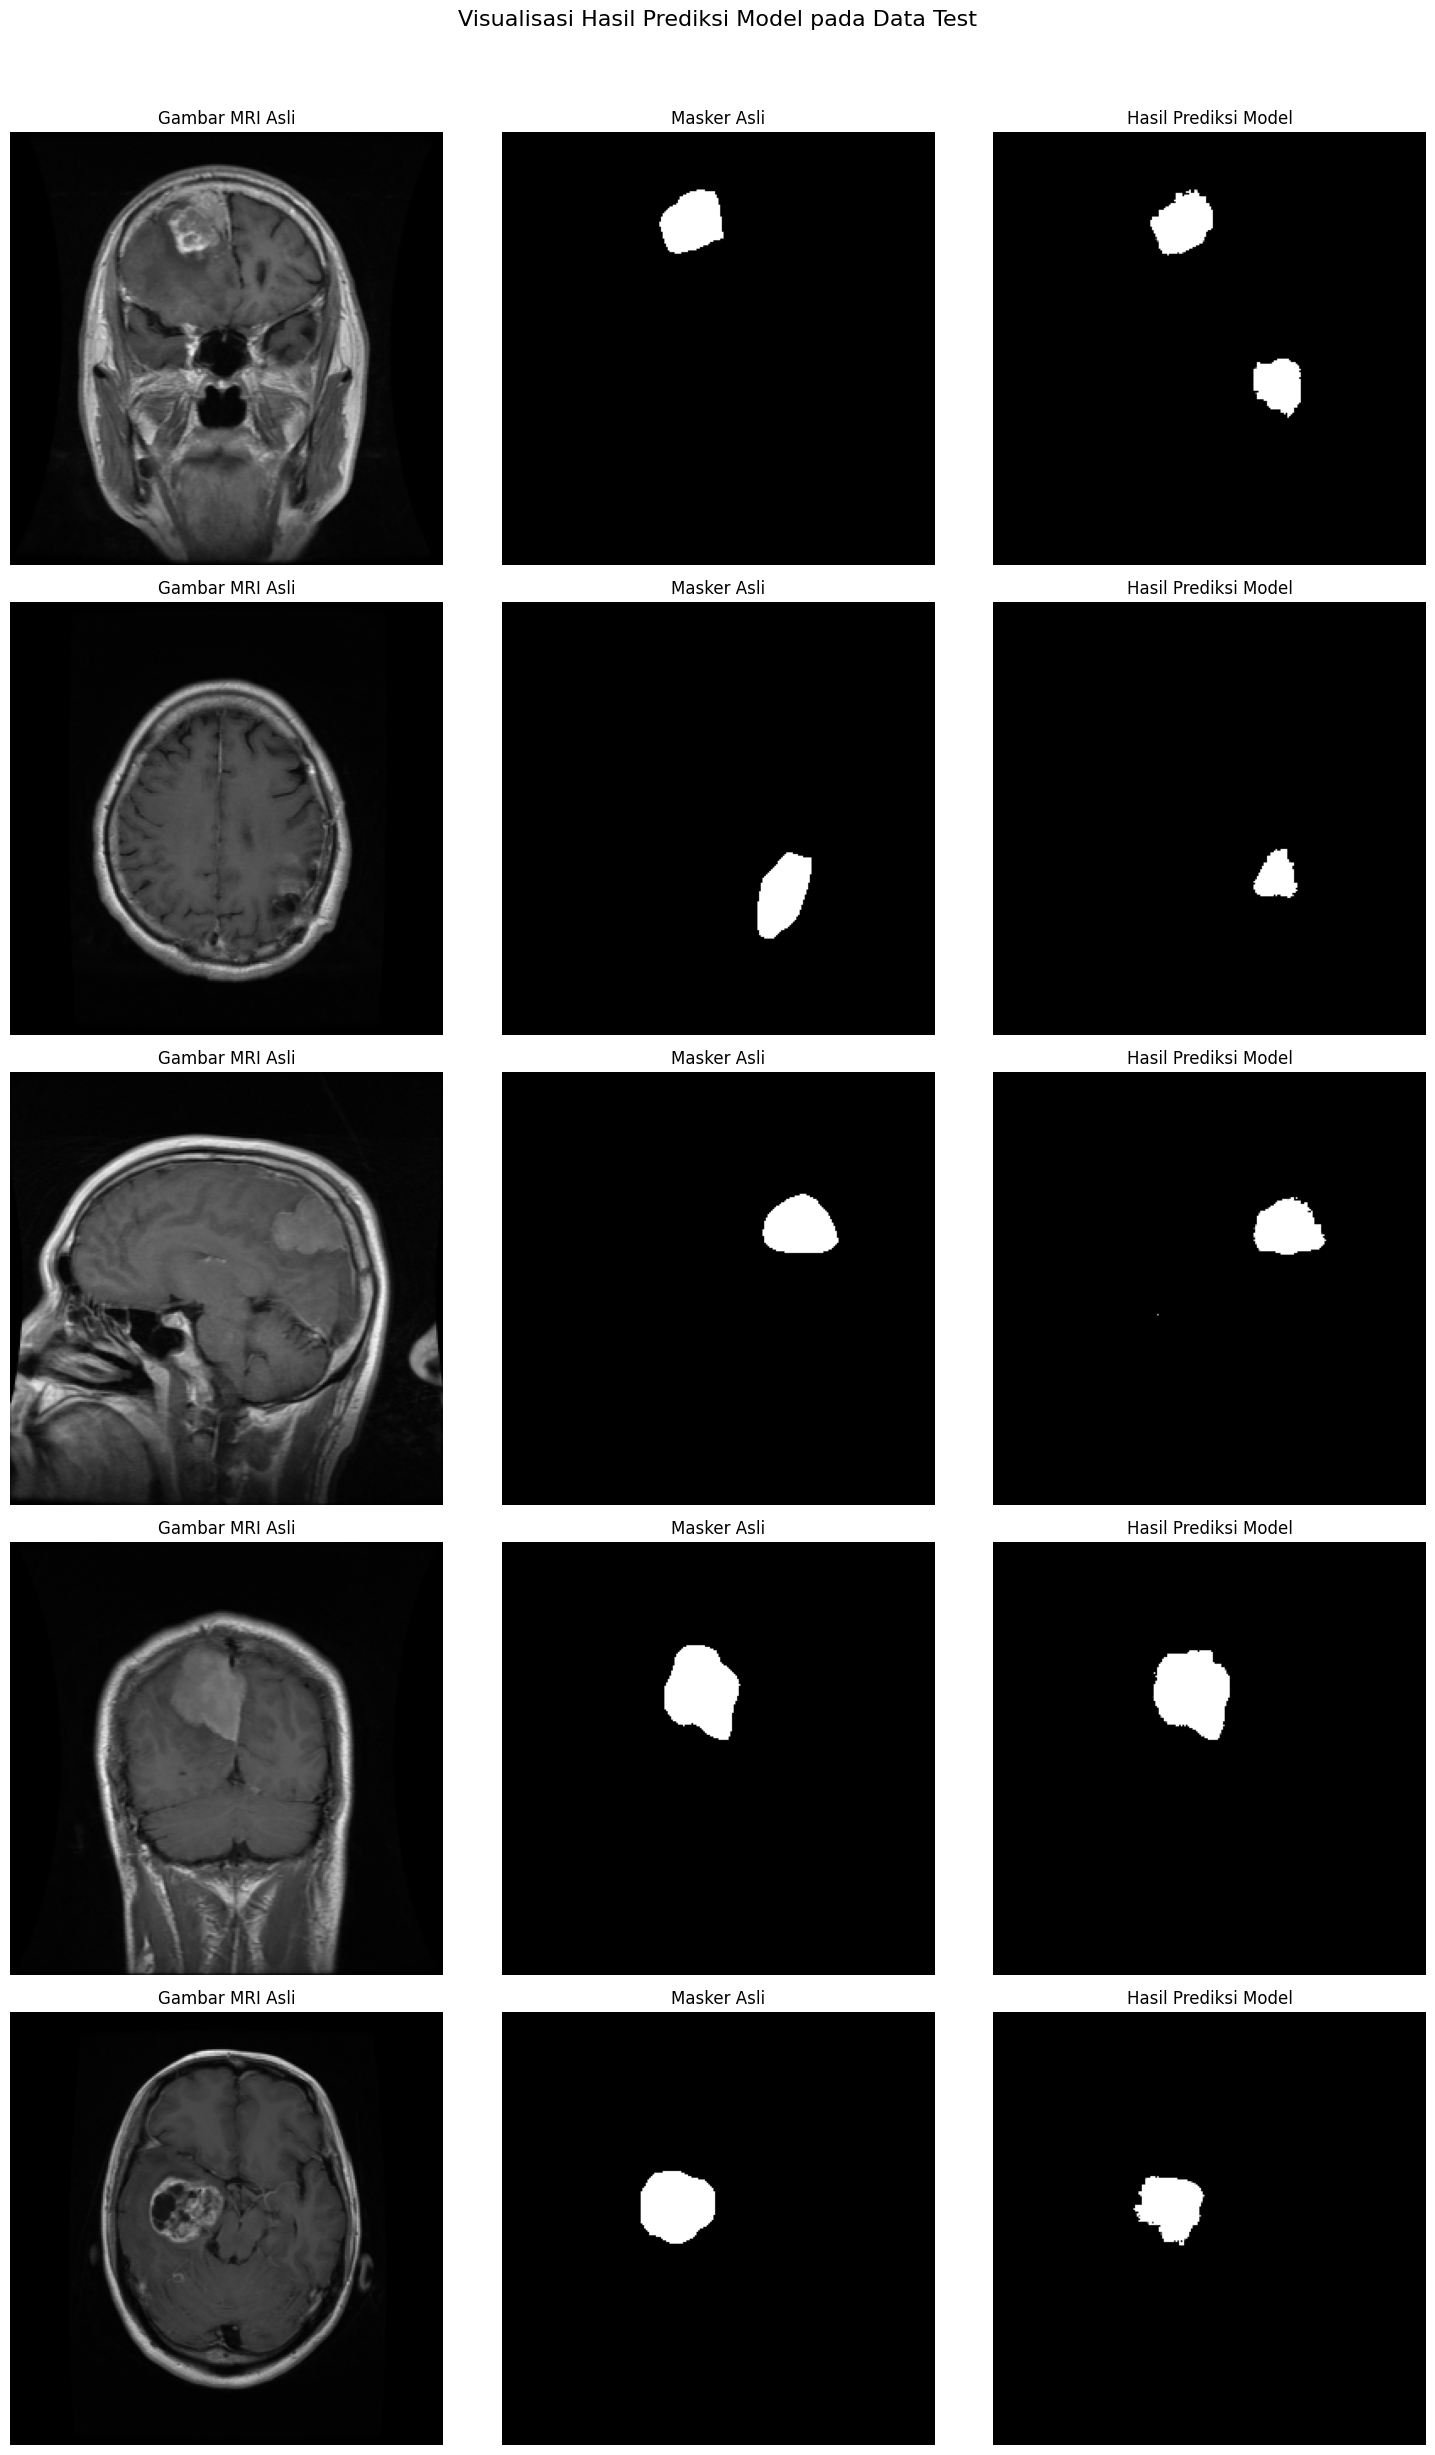

In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras_unet_collection.transformer_layers import SwinTransformerBlock, patch_extract, patch_embedding, patch_merging, patch_expanding

save_path = '/content/drive/MyDrive/ProyekPemrograman/TO/proyek_to_data'
model_path = os.path.join('/content/drive/MyDrive/ProyekPemrograman/TO', 'swin_unet_brain_tumor_best.keras')

print("\nMemuat data test...")
X_test = np.load(os.path.join(save_path, 'X_test.npy'))
y_test = np.load(os.path.join(save_path, 'y_test.npy'))
print(f"Data test berhasil dimuat. Shape: {X_test.shape}")

def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(y_true * y_pred, axis=[1,2,3])
    union = tf.keras.backend.sum(y_true, axis=[1,2,3]) + tf.keras.backend.sum(y_pred, axis=[1,2,3])
    return tf.keras.backend.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
def dice_loss(y_true, y_pred): return 1 - dice_coefficient(y_true, y_pred)
def iou(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=[1,2,3])
    union = tf.keras.backend.sum(y_true,[1,2,3])+tf.keras.backend.sum(y_pred,[1,2,3])-intersection
    return tf.keras.backend.mean((intersection + smooth) / (union + smooth), axis=0)
custom_objects = {'dice_loss': dice_loss, 'dice_coefficient': dice_coefficient, 'iou': iou,
                  'SwinTransformerBlock': SwinTransformerBlock, 'patch_extract': patch_extract,
                  'patch_embedding': patch_embedding, 'patch_merging': patch_merging,
                  'patch_expanding': patch_expanding}

# Muat model terbaik
print(f"\nMemuat model juara dari: {model_path}...")
model_terbaik = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
print("Model terbaik berhasil dimuat!")

# Evaluasi dengan data test
print("\nMengevaluasi performa final model pada data test..")
hasil_evaluasi = model_terbaik.evaluate(X_test, y_test)

print("\n" + "="*50)
print("           HASIL AKHIR")
print("="*50)
print(f"Loss pada Data Test           : {hasil_evaluasi[0]:.4f}")
print(f"Dice Coefficient pada Data Test : {hasil_evaluasi[1]:.4f} (atau {hasil_evaluasi[1]*100:.2f}%)")
print(f"IoU pada Data Test              : {hasil_evaluasi[2]:.4f} (atau {hasil_evaluasi[2]*100:.2f}%)")
print("="*50)

# Visual hasil prediksi
print("\nMenyiapkan visualisasi hasil prediksi...")

num_samples = 5
sample_indices = random.sample(range(len(X_test)), num_samples)

plt.figure(figsize=(15, 5 * num_samples))
plt.suptitle("Visualisasi Hasil Prediksi Model pada Data Test", fontsize=16)
for i, index in enumerate(sample_indices):
    test_image = X_test[index]
    true_mask = y_test[index]
    predicted_mask = model_terbaik.predict(np.expand_dims(test_image, axis=0))[0]

    plt.subplot(num_samples, 3, i * 3 + 1)
    plt.imshow(test_image)
    plt.title("Gambar MRI Asli")
    plt.axis('off')

    plt.subplot(num_samples, 3, i * 3 + 2)
    plt.imshow(true_mask.squeeze(), cmap='gray')
    plt.title("Masker Asli")
    plt.axis('off')

    plt.subplot(num_samples, 3, i * 3 + 3)
    plt.imshow(predicted_mask.squeeze(), cmap='gray')
    plt.title("Hasil Prediksi Model")
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()